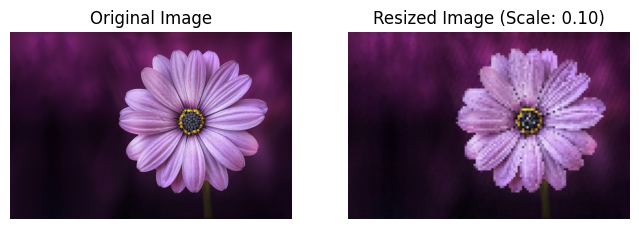

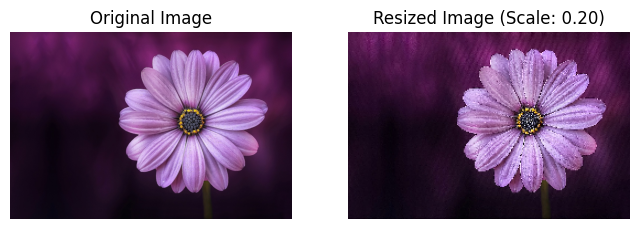

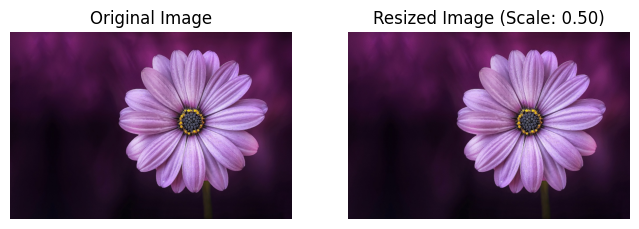

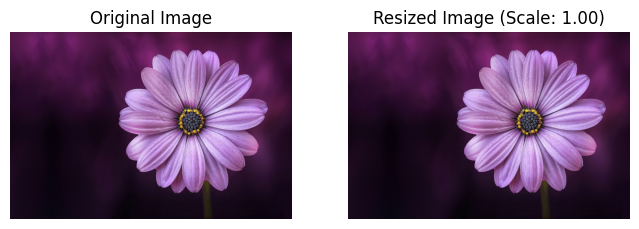

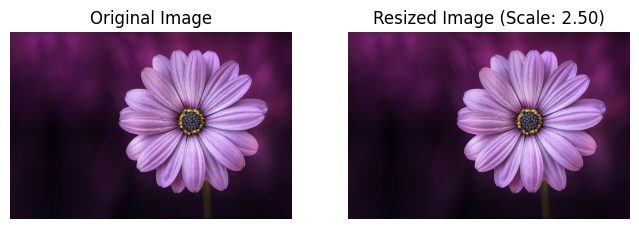

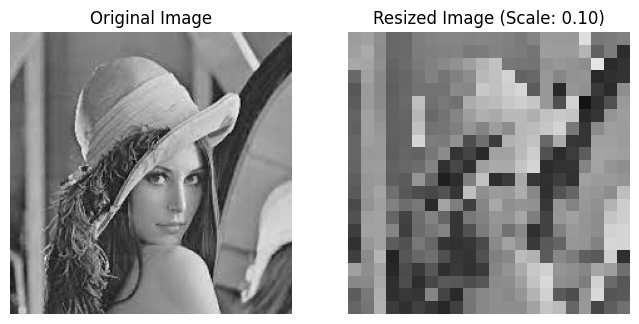

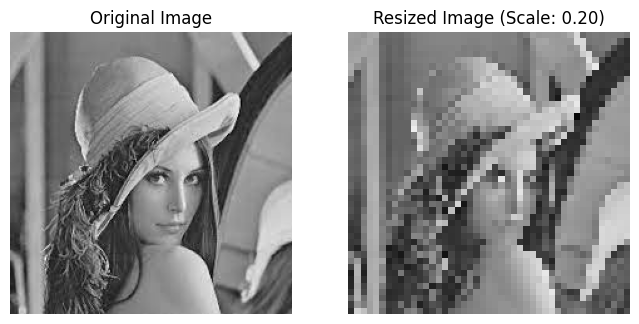

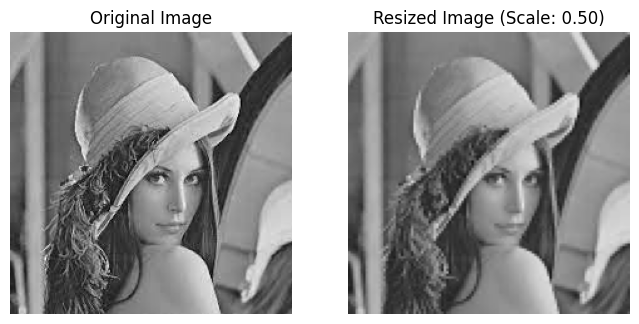

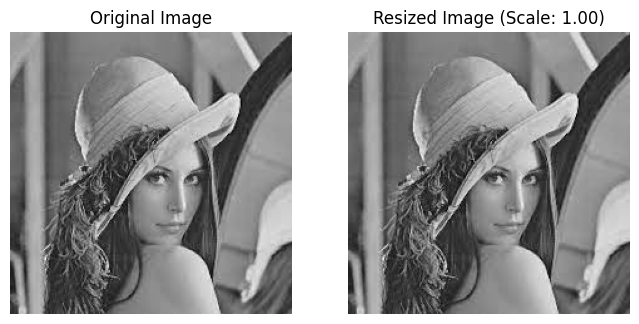

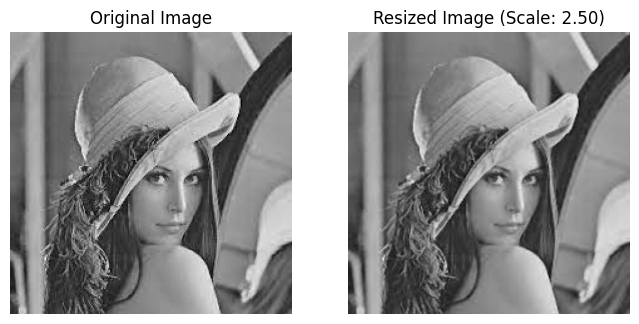

In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def resize_images(input_folder, output_folder, scaling_factors):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get the list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        # Read the original image
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        # Resize the image with varying scaling factors
        for scale_factor in scaling_factors:
            resized_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

            # Save the resized image
            # output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_scaled_{scale_factor:.2f}.png")
            # cv2.imwrite(output_path, resized_image)

            # Display the original and resized images for visual comparison
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"Resized Image (Scale: {scale_factor:.2f})")
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.show()

if __name__ == "__main__":
    # Set your input and output folders
    input_folder = r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\new_data"
    output_folder = r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\resized_images"

    # Set the scaling factors you want to evaluate
    scaling_factors = [0.1,0.2,0.5, 1.0, 2.5]

    # Resize images and evaluate visual quality
    resize_images(input_folder, output_folder, scaling_factors)

2. Resize an image using different interpolation methods (e.g., cv2.INTER_NEAREST,
   cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4). Measure and compare the
   processing time for each method.
   Dynamic Assignment: Do it for a set of images in a folder and save the interpolated images into an output folder.


Interpolation Method: 0, Processing Time: 0.0130255222320557 seconds


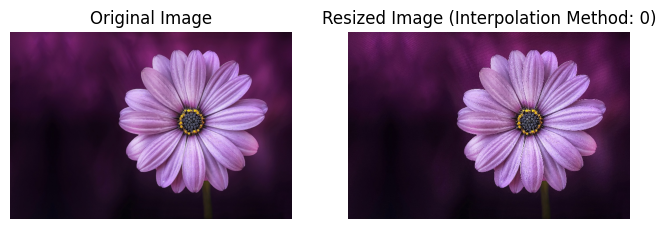

Interpolation Method: 1, Processing Time: 0.0203659534454346 seconds


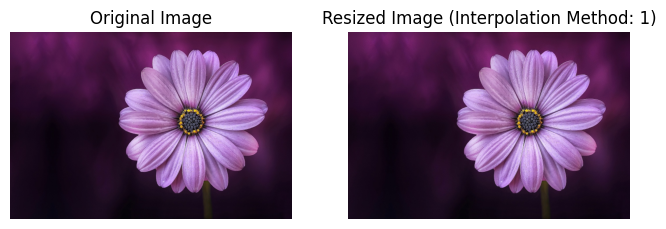

Interpolation Method: 2, Processing Time: 0.0155284404754639 seconds


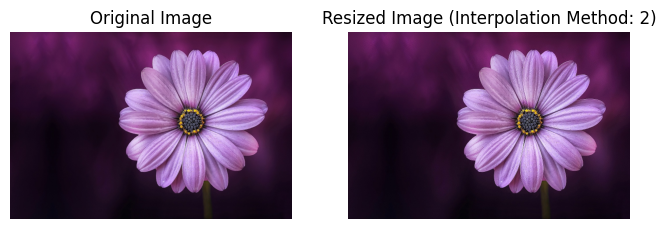

Interpolation Method: 4, Processing Time: 0.0150592327117920 seconds


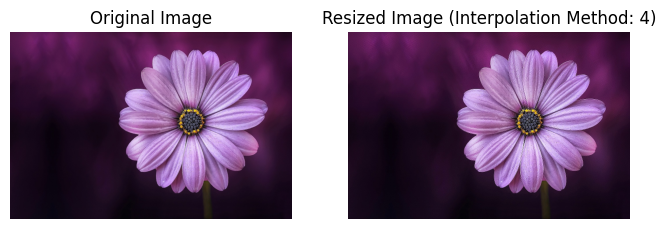

Interpolation Method: 0, Processing Time: 0.0000000000000000 seconds


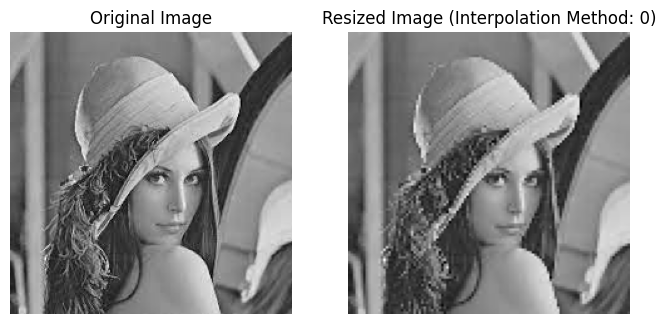

Interpolation Method: 1, Processing Time: 0.0014867782592773 seconds


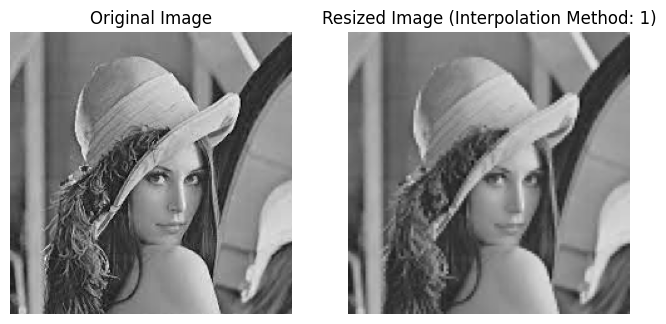

Interpolation Method: 2, Processing Time: 0.0010528564453125 seconds


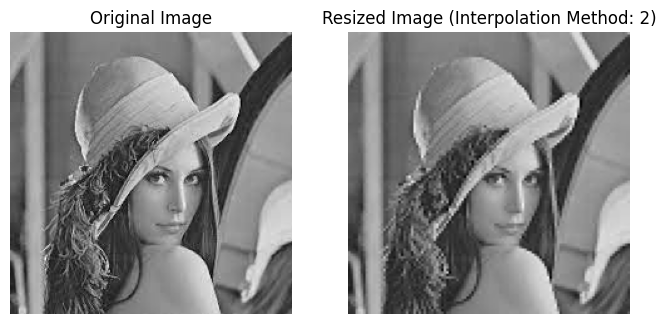

Interpolation Method: 4, Processing Time: 0.0010101795196533 seconds


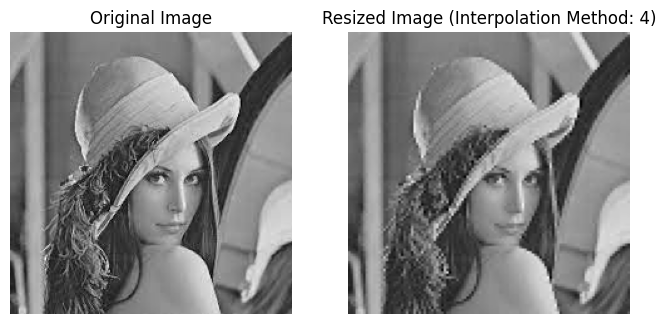

In [20]:
import cv2
import time
import os

def resize_images(input_folder, output_folder, interpolation_methods):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get the list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        # Read the original image
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        # Resize the image using different interpolation methods
        for method in interpolation_methods:
            start_time = time.time()
            original_image = cv2.imread(original_image_path)
            resized_image = cv2.resize(original_image, None, fx=0.5, fy=0.5, interpolation=method)

            end_time = time.time()
            processing_time = end_time - start_time
            
            #Save the resized image
            output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_{method}_resized.png")
            cv2.imwrite(output_path, resized_image)
            # Print the processing time for each method
            print(f"Interpolation Method: {method}, Processing Time: {processing_time:.16f} seconds")
            # Display the original and resized images for visual comparison
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title(f"Resized Image (Interpolation Method: {method})")
            plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

            plt.show()

if __name__ == "__main__":
    # Set your input and output folders
    input_folder = r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\new_data"
    output_folder = r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\resized_images2"

    # Set the interpolation methods you want to evaluate
    interpolation_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]

    # Resize images and measure processing time for each method
    resize_images(input_folder, output_folder, interpolation_methods)

3. Resize images with and without preserving the aspect ratio. Evaluate the visual differences between the
   two sets of scaled images and analyse how aspect ratio preservation affects the overall perception.


When resizing images, preserving the aspect ratio means maintaining the proportional relationship between the width and height of the original image.
If you resize without preserving the aspect ratio, the resulting image might appear stretched or compressed.


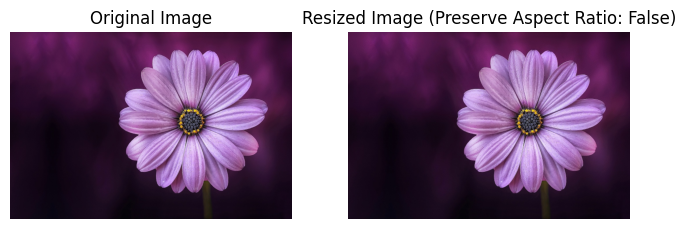

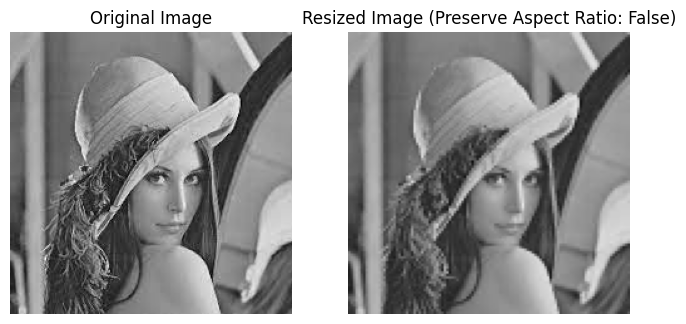

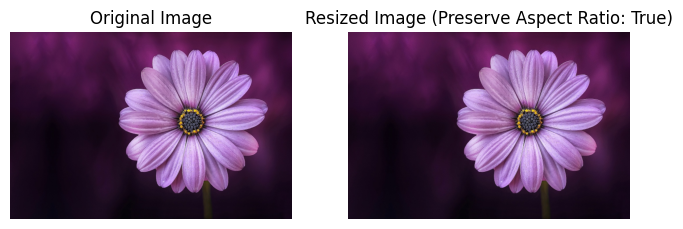

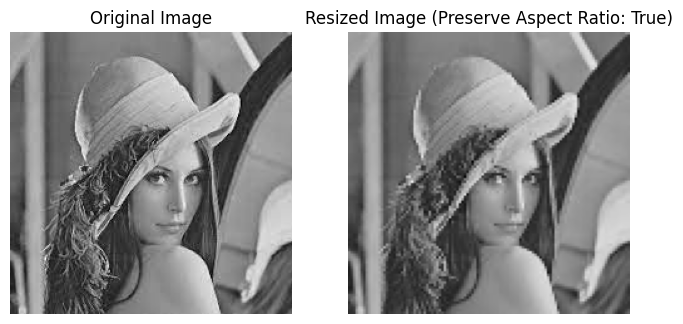

In [13]:
import cv2
import os
import matplotlib.pyplot as plt

def resize_images(input_folder, output_folder, scaling_factor, preserve_aspect_ratio):
    # Create the output folder if it doesn't exist
    # if not os.path.exists(output_folder):
    #     os.makedirs(output_folder)

    # Get the list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    for image_file in image_files:
        # Read the original image
        original_image_path = os.path.join(input_folder, image_file)
        original_image = cv2.imread(original_image_path)

        if preserve_aspect_ratio:
            # Resize while preserving the aspect ratio
            resized_image = resize_with_aspect_ratio(original_image, scaling_factor)
        else:
            # Resize without preserving the aspect ratio
            resized_image = cv2.resize(original_image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_LINEAR)

        # Save the resized image
        # output_path = os.path.join(output_folder, f"{os.path.splitext(image_file)[0]}_scaled_{scaling_factor:.2f}.png")
        # cv2.imwrite(output_path, resized_image)

        # Display the original and resized images for visual comparison
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Resized Image (Preserve Aspect Ratio: {preserve_aspect_ratio})")
        plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.show()

def resize_with_aspect_ratio(image, scaling_factor):
    # Get the original image dimensions
    height, width = image.shape[:2]

    # Calculate the new dimensions while preserving the aspect ratio
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    return resized_image

if __name__ == "__main__":
    # Set your input and output folders
    input_folder = r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\new_data"
    output_folder = r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\resized_images2"

    # Set the scaling factor
    scaling_factor = 0.5

    # Resize images without preserving the aspect ratio
    resize_images(input_folder, output_folder, scaling_factor, preserve_aspect_ratio=False)

    # Resize images with preserving the aspect ratio
    resize_images(input_folder, output_folder, scaling_factor, preserve_aspect_ratio=True)


Without Preserving Aspect Ratio:

The images will be resized directly using the specified scaling factor for both width and height.
If the scaling factor is the same for width and height, the images will appear uniformly stretched or compressed.
Objects or shapes in the images may appear distorted, as the proportional relationship between width and height is not maintained.
With Preserving Aspect Ratio:

The images will be resized while maintaining the original aspect ratio.
Objects and shapes in the images will not be distorted, and the overall appearance of the content will be preserved.
The resized images will have the specified scaling factor applied to both width and height, but the aspect ratio will be the same as in the original images.


Interpretation:

If aspect ratio preservation is not a concern, the first set of images might be suitable for scenarios where uniform scaling is acceptable, such as when the content is not sensitive to distortion.

If maintaining the integrity of the original content and avoiding distortion is important, the second set of images (with aspect ratio preservation) should be preferred. This is often the case in applications like image recognition, computer vision, or any scenario where accurate representation of objects or shapes is crucial.


4. Rotate a given image at different angles (e.g., 30 degrees, 60 degrees, 90 degrees) using OpenCV.
   Assess the visual quality and potential loss of information. Compare the results to determine the
   optimal rotation angle for minimal distortion.
   Dynamic Assignment: Do it for a set of images in a folder and save the rotated images into an output folder


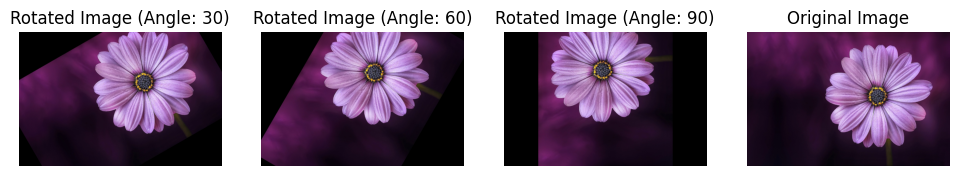

In [14]:
#4. 4.	Rotate a given image at different angles 
#(e.g., 30 degrees, 60 degrees, 90 degrees) using OpenCV. 
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

original_image = cv2.imread(r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\flower.jpg")

# Set rotation angles
rotation_angles = [30, 60, 90]

# Create a subplot for each rotation angle
plt.figure(figsize=(12, 4))
for i, angle in enumerate(rotation_angles, 1):
    rotated_image = rotate_image(original_image, angle)

    # Display original and rotated images side by side
    plt.subplot(1, len(rotation_angles) + 1, i)
    plt.title(f"Rotated Image (Angle: {angle})")
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Display the original image
plt.subplot(1, len(rotation_angles) + 1, len(rotation_angles) + 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


To assess the visual quality and potential loss of information due to rotation, you can rotate the given image at different angles and visually compare the results. Additionally, you can calculate metrics to quantify the distortion in the images.


In [15]:
# import cv2
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.metrics import structural_similarity as ssim

# def rotate_image(image, angle):
#     rows, cols = image.shape[:2]
#     center = tuple(np.array(image.shape[1::-1]) / 2)
#     rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
#     rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
#     return rotated_image

# def calculate_ssim(original, rotated):
#     # Calculate Structural Similarity Index (SSIM)
#     min_side = min(original.shape[0], original.shape[1])
#     win_size = min(min_side, 7)  # Set win_size to be an odd value less than or equal to the smaller side
#     _, ssim_val = ssim(original, rotated, full=True, win_size=win_size)
#     return ssim_val

# def evaluate_rotation_quality(original_image, angles):
#     plt.figure(figsize=(12, 8))

#     for i, angle in enumerate(angles):
#         # Rotate the image
#         rotated_image = rotate_image(original_image, angle)

#         # Visualize the rotated image
#         plt.subplot(2, 3, i+1)
#         plt.title(f"Rotated Image (Angle: {angle} degrees)")
#         plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
#         plt.axis('off')

#         # Calculate SSIM between original and rotated images
#         ssim_val = calculate_ssim(original_image, rotated_image)
#         print(f"Angle: {angle} degrees, SSIM: {ssim_val:.4f}")

#     # Display the original image
#     plt.subplot(2, 3, 6)
#     plt.title("Original Image")
#     plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

#     plt.show()

# if __name__ == "__main__":
    
#     original_image = cv2.imread(r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\flower.jpg")

#     # Set the angles for rotation
#     rotation_angles = [30, 60, 90]

#     # Evaluate rotation quality and visualize the results
#     evaluate_rotation_quality(original_image, rotation_angles)


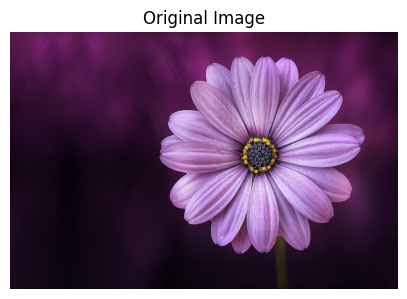

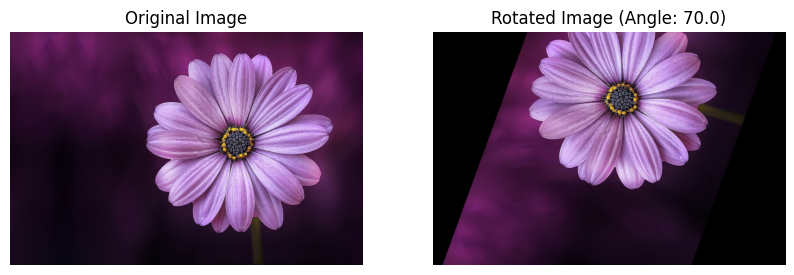

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def display_rotated_image(image, angle):
    rotated_image = rotate_image(image, angle)
    
    # Display the comparison using Matplotlib
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Rotated Image (Angle: {angle})")
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    # Load the original image
    original_image = cv2.imread(r"C:\Users\ashuo\Downloads\GithubProjects\OpenCV-Computer-Vision\LAB_3\flower.jpg")
    
    # Display the original image
    plt.figure(figsize=(5, 5))
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    while True:
        # Get user input for rotation angle
        angle = float(input("Enter rotation angle (press 'q' to exit): "))

        # Rotate the image and display the comparison
        display_rotated_image(original_image, angle)

        # Check if the user wants to exit
        user_input = input("Press 'q' to exit, any other key to continue: ")
        if user_input.lower() == 'q':
            break
